# 🖼️ Meme Generator Lab: Student Lab <> Getting Started
Ref repository: https://github.com/IFML-UT/MLLAcademy-2025

**What we're going to do inside of this notebook:**

> This notebook is used to simulate student interactions with the meme generator pipeline.
Use it to validate that the full captioning stack is working before you begin creating a meme of your own.

## 🗺️ Roadmap for the entire lab:
> The lab is broken down into 3 major sections:

1. **Working with LLMs & Inference**: You'll use an open source large language model (LLM) to generate a meme based on general topics or themes. You'll select the best caption from 3 results. We'll be using Meta's `Llama` model family for this text generation

{picture placeholder}

2. **Multi-modal Generative AI:** With your caption from the first part of the lab, you will use OpenCLIP to query the top 3 matches from a library of popular meme images to select the best image, based on your text caption. You'll understand what multi-modal means, and how a pre-trained vision transformer model like `ViT-B-32` can return relevant images based on text inputs.


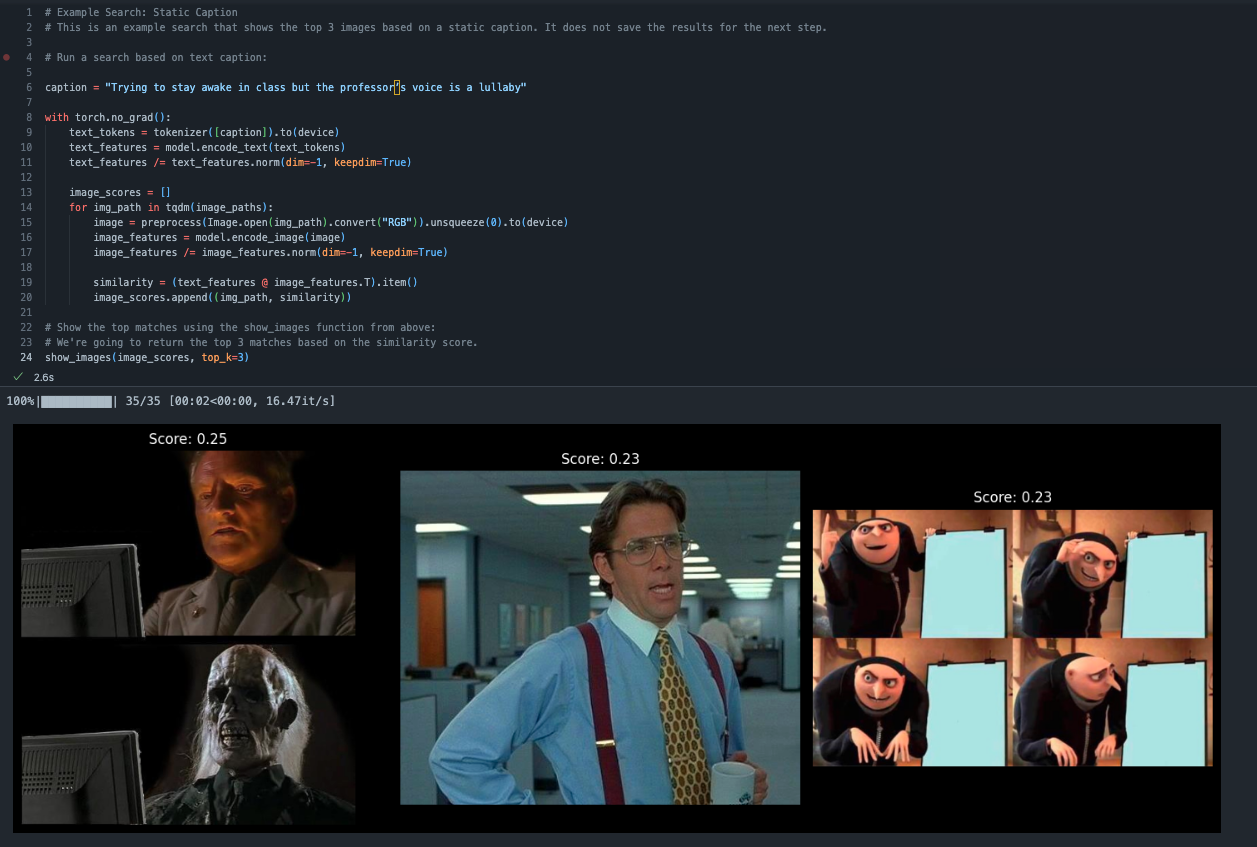

3. Combine both the generated text and best image into your final meme.

![Screenshot 2025-05-28 at 13.57.14.png](<attachment:Screenshot 2025-05-28 at 13.57.14.png>)


## ⚙️ How It Works**:
- Inputs a freeform meme idea or phrase
- Classifies it into a pre-approved topic
- Uses LLaMA 3.1 8B Instruct (via Hugging Face) to generate 3 clean meme captions
- Filters for profanity or off-topic content



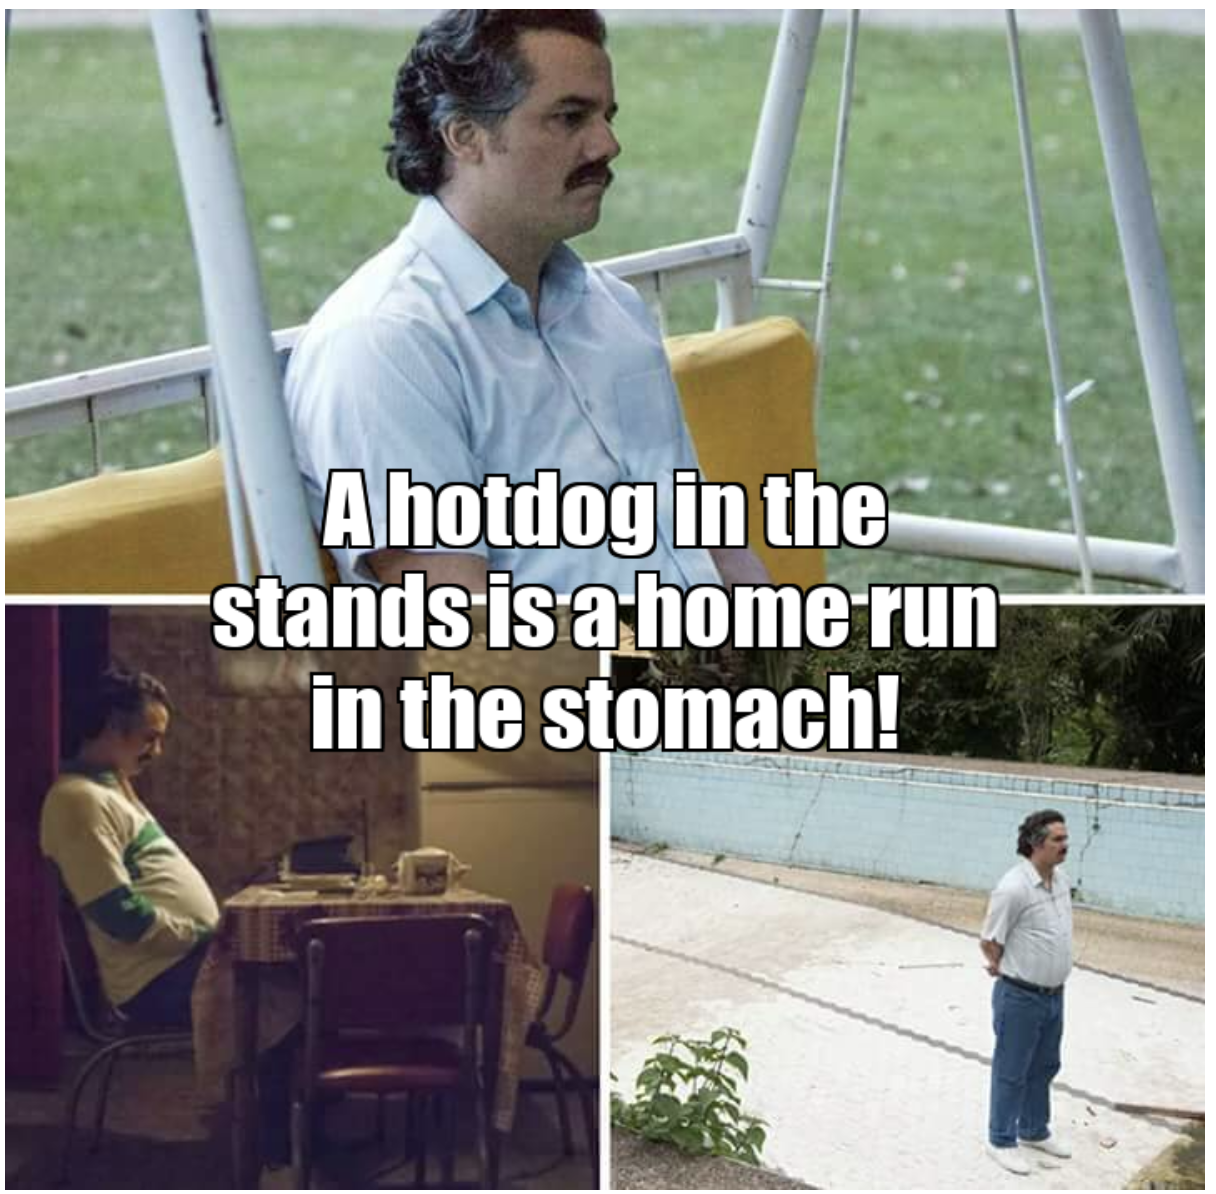

In [ ]:
# Setup -- Run this cell first to install dependencies and import necessary modules.
# This script is designed to be run in a Jupyter notebook environment, such as Google Colab or a local Jupyter setup.
# It installs required packages and imports functions for generating safe captions from images.

!git clone https://github.com/IFML-UT/MLLAcademy-2025.git
# 🛠️ Install dependencies (for Colab or Drive-mount workflows)


# !pip install -q \
#   torch \
#   transformers==4.50.0 \
#   huggingface_hub==0.20.3 \
#   sentence-transformers==2.2.2 \
#   accelerate==0.21.0 \
#   better_profanity \
#   ipywidgets==7.6.5

import os
import sys
import re
import json
from pathlib import Path
from getpass import getpass

# Ensure utils folder is in path for import
sys.path.append(str(Path("..", "utils").resolve()))
# Import python file for generation and safe captioning
from safe_caption_generator import safe_caption_generator

ERROR: Cannot install huggingface_hub==0.20.3 and transformers==4.50.0 because these package versions have conflicting dependencies.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts
Loading embedding model for semantic topic matching...


In [6]:
# Helper - for printing captions cleanly and export the results to a JSON file
# This file will be used later when we generate the images 

def print_captions(captions):
    with open("../captions.json", "w") as f:
        json.dump(captions, f)
    print("\n---\n\n")
    for i, c in enumerate(captions, 1):
        print(f"Caption {i}: {c}\n")

“Paste your Hugging Face API token here. If you don't have one, visit https://huggingface.co/settings/tokens, create a free account, and copy your access token.”

## Type in a prompt between the quotes 
This will assign your topic to the variable `user_input`
 - Running the cell below will then run the caption generator and print the captions
 
Additionally, we are going to be using a Python function called `safe_caption_generator` to assist us in prompting the LLM. For example, this code is within the function and prompts the LLM prior to its text generation, based on your input: 

```
PROMPT_TEMPLATE = (
    "Write a short, funny meme caption about this topic: {user_input}.\n"
    "Only return a single caption, in quotes, with no explanation or extra text."
)
```

### We are going to specifically guide our text generation to stay aligned on certain topics.
You may find that certain topics will be blocked from use. If you run into a "try again error message" please adjust your input. Here are the broad topics we are going to use within this lab for your captions: 
- "final exams"
- "group projects"
- "studying late", 
- "Monday mornings"
- "school cafeteria food"
- "summer break"
- "forgetting your homework"
- "getting a pop quiz"
- "trying to stay awake in class"
- "sports"
- "coding projects"
- "hackathons"
- "hanging out with friends"
- "summer weather"
- "family vacations"
- "college applications"
-  "video games"

_You don't have to use these exact words in your `user_input`, but it needs to be semantically similar. For example, "Going to a baseball game instead of studying" would match our themes of both `sports` and `forgetting your homework`, and possibly even `studying late`._

### Hugging Face Inference API: 
To help keep this lab computationally light and flexible for our lab use, we are using Hugging Face inference token (generated by IFML) for your use during this week. 
- API stands for application programing interface, once configured it allows two different software applications communicate and send data to one another. 
- This secret token will expire after this week. If you would like to continue to run this lab later on your own, you can do so by creating a free HuggingFace account, creating a token within the free tier (https://huggingface.co/settings/tokens) and then pasting your new token into the cell's `getpass` feature below. 


 > Note: This cell may take anywhere from 30 seconds to 2 minutes depending on your prompt and notebook compute resources at the time of execution.

In [ ]:
# --- Populate our hf_token.txt file with the secret token for access to the
# --- Hugging Face API. This is needed to access the model and generate captions.

token_path = Path("../hf_token.txt")
if not token_path.exists():
    print("Please enter your Hugging Face API token:")
    token = getpass("Hugging Face Token: ")
    with open(token_path, "w") as f:
        f.write(token.strip())
    print(f"✅ Hugging Face token saved to {token_path}")
else:
    print(f"✅ Hugging Face token found at {token_path}")

# --- Now we are going to run the safe caption generator based on your input ---

try: 
    user_input = "summer school or summer break?"
    print(f"Testing prompt: '{user_input}'")
    captions = safe_caption_generator(user_input, num_captions=3)
    print_captions(captions)

except ValueError as e:
    print(f"⚠️ Error: {e}")

Testing prompt: 'summer school or summer break?'

---


Caption 1: Summer school: where you pay to relearn what you forgot, and also get sunburned, but still no homework

Caption 2: Better a tan, than a GPA

Caption 3: Is summer school like when you burn toast but you're too lazy to make another piece. It's like, why fix it if you can just make do with it?



In [ ]:
# Interactive Prompt (for Demo in class)
from IPython.display import display
import ipywidgets as widgets

input_box = widgets.Text(value='', placeholder='Enter your meme idea...', description='Prompt:')
run_button = widgets.Button(description="Generate")
output = widgets.Output()

def run_on_click(b):
    output.clear_output()
    with output:
        try:
            captions = safe_caption_generator(input_box.value)
            # for idx, c in enumerate(captions, 1): # backup code to print each caption rather than use function
            #   print(f"{idx}. {c}")
            print_captions(captions)
        except Exception as e:
            print(f"⚠️ Error: {e}")

run_button.on_click(run_on_click)
display(input_box, run_button, output)

Text(value='', description='Prompt:', placeholder='Enter your meme idea...')

Button(description='Generate', style=ButtonStyle())

Output()

## Troubleshooting Guide

- If you get a profanity or topic error, verify the input is:
  - Clean (no banned phrases)
  - Topically close to: studying, group projects, sports, coding, school, etc.

- If you get an API error:
  - Ensure `hf_token.txt` exists and contains a valid Hugging Face token; if the token is missing, please ask for a new token.
  - Ensure `.gitignore` excludes it from version control

- If you get no captions back:
  - Check output formatting with `print(repr(captions))`
  - Rerun cell — model output may vary by seed

---
✅ Instructor notebook complete. Move on to Notebook A when you're ready.
